In [5]:
import os
import pandas as pd

In [6]:
data_path = os.path.join('DataSets','Housing')

In [7]:
def load_housing_data(housing_path=data_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [23]:
housing=load_housing_data()

In [28]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    #print(shuffled_indices)
    #print(test_indices)
    #print(train_indices)
    #print(data.iloc[train_indices], data.iloc[test_indices])
    return data.iloc[train_indices], data.iloc[test_indices]


In [29]:
train_set, test_set = split_train_test(housing, 0.2)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

In [ ]:
# PROBLEM!
#if you run the program again, it will generate a different test set! 
#Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, which you want to avoid

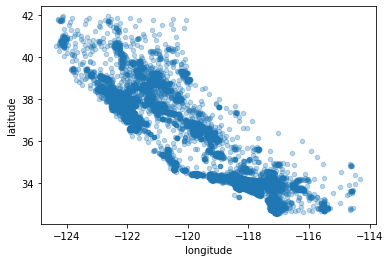

In [34]:
#haminjoori hala inam bebin!
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3)
plt.show()

In [35]:
# SOLUTION
#save the test set
#np.random.seed(42)
#these solutions will break the next time you fetch an updated dataset


In [36]:
#use each instance’s identifier to decide whether or not it should go in the test set

In [37]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [38]:
#housing dataset does not have an identifier column
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")